# Gapminder World
Dataset from Gapminder World website from 1952 to 2007.

**Os dados foram obtidos do kaggle:**[Gapminder World](https://www.kaggle.com/datasets/tklimonova/gapminder-datacamp-2007?datasetId=373567&sortBy=voteCount&select=gapminder_full.csv)


<a id="ancora"></a>
# Índice
* [Problema](#ancora1)
* [Sobre os Dados](#ancora2)
* [Limpeza e Pré-processamento](#ancora3)
    * [Transformação e Manipulação](#ancora3.1)    
    * [Registros missing](#ancora3.3) 
        
* [Análise Exploratória](#ancora4)
    * [Existe alguma correlação do PIB com o aumento da expectativa de vida?](#ancora4.1)
    * [Quais os 5 Países com maior e menor PIB per capita em 2007?](#ancora4.2)
    * [Qual a expectativa de vida por continente no ano de 2007?](#ancora4.3)
    * [Informe os 5 Países com maior e menor expectativa de vida:](#ancora4.4)
    * [Informe o total da população por Continente:](#ancora4.5)
    * [Quais os 5 países com maior e menor população em 2007?](#ancora4.6)


## **Sobre os Dados**
<a id="ancora2"></a>

### O conjunto de dados é composto pelas seguintes variáveis:

* **country**: País;
* **year**: anos de 1952 a 2007;
* **population**:População em quanidade;
* **continent**: Continente;
* **life_exp**: expectativa de vida;
* **gdp_cap**: PIB;

## **Limpeza e Pré-processamento** 
<a id="ancora3"></a>


In [63]:
# importação das bibliotecas
#importando as libs para a análise.
import pandas as pd 
import numpy as np
import statsmodels as st
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import cufflinks as cf
from plotly.offline import plot, iplot
import warnings
warnings.filterwarnings("ignore")
import missingno as missing
pd.set_option('display.float_format', lambda x: '%.3f' % x)
 

In [27]:
# Carregando o dataset, convertendo a coluna year para o tipo date e selecionando a mesma como index
df = pd.read_csv('../datasets/gapminder_full.csv',header=0,index_col=1, parse_dates=True)

In [87]:
# Carregando o dataset
df = pd.read_csv('../datasets/gapminder_full.csv')

In [88]:
# visualizando as 5 primeiras linhas
df.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445
1,Afghanistan,1957,9240934,Asia,30.332,820.853
2,Afghanistan,1962,10267083,Asia,31.997,853.101
3,Afghanistan,1967,11537966,Asia,34.020,836.197
4,Afghanistan,1972,13079460,Asia,36.088,739.981


In [89]:
# Exibindo os valores que são únicos de cada feature.
print("Valores únicos (por coluna):\n{}\n".format(df.nunique()))

Valores únicos (por coluna):
country        142
year            12
population    1704
continent        5
life_exp      1626
gdp_cap       1704
dtype: int64



### Transformação e Manipulação
<a id="ancora3.1"></a>
[voltar](#ancora)

* **Alterando os tipos de dados para reduzir o uso de recursos computacionais.**

In [90]:
# informação do tipo, tamnanho e  verificação de dados nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   population  1704 non-null   int64  
 3   continent   1704 non-null   object 
 4   life_exp    1704 non-null   float64
 5   gdp_cap     1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [91]:
#Convertendo os dados tipo de object para categóricos
df['country'] = df['country'].astype('category')
df['continent'] = df['continent'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   country     1704 non-null   category
 1   year        1704 non-null   int64   
 2   population  1704 non-null   int64   
 3   continent   1704 non-null   category
 4   life_exp    1704 non-null   float64 
 5   gdp_cap     1704 non-null   float64 
dtypes: category(2), float64(2), int64(2)
memory usage: 63.8 KB


* **O espaço em memória foi reduzido de 80 kb para 64.6 kb**
* **Parece pouco, mas imaginem em um ambiente de produção com uma base na casa dos Terabytes, reduzir o tamanho do conjunto, certamente trará muitos benefícios, como redução de recursos computacionais e velocidade no processamento.**
* **Agora podemos seguir a análise.**

### Registros missing
<a id="ancora3.3"></a>
[voltar](#ancora)

country       0
year          0
population    0
continent     0
life_exp      0
gdp_cap       0
dtype: int64

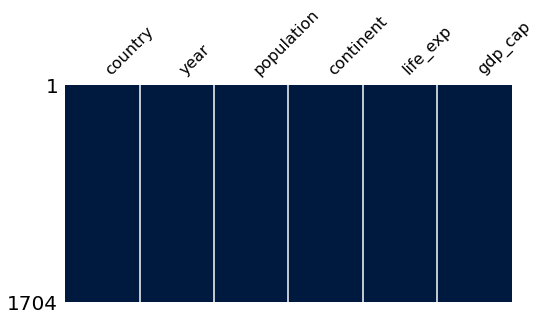

In [92]:
# Conferindo se existem dados faltantes.
missing.matrix(df, figsize = (8, 4), color = (0, 0.1, 0.25), sparkline = False);
df.isnull().sum()

## Análise Exploratória
<a id="ancora4"></a>

### Existe alguma correlação do PIB com o aumento da expectativa de vida?
<a id="ancora4.1"></a>
[voltar](#ancora)

In [343]:
# função para plotar o gráfico do pib vs expectativa de vida.
def pib_exp_life(year):
    df_year = df[df['year']==year]
    fig = df_year.iplot(x='gdp_cap',
                  y='life_exp',
                  categories='continent',
                  title=f'PIB vs Expectativa de Vida de {year} por Continente',
                  xTitle='PIB',
                  yTitle='Expectativa de Vida')
    return fig

In [290]:
#Pib vs expectativa de vida
pib_exp_life(2007)

* **Existe uma correlação positiva entre o PIP e a expectativa de vida da população**;
* **Conforme o PIP de um Continente cresce, a expectativa de vida aumenta**;

In [ ]:
### Existe correlação do PIB percapta com o crescimento da população?
<a id="ancora4.2"></a>
[voltar](#ancora)

In [322]:
# função para plotar o gráfico do pib vs população.
def pib_population(year):
    df_year = df[df['year']==year]
    fig = df_year.iplot(x='gdp_cap',
                  y='population',
                  categories='continent',
                  title=f'PIB vs População de {year} por Continente',
                  xTitle='PIB',
                  yTitle='População')
    return fig

In [325]:
pib_population(2007)

* **Não há correlação significativa entre o crescimento do pib com a população**;

In [ ]:
### A medida que a população cresce a Expectativa de vida tabém aumenta?
<a id="ancora4.3"></a>
[voltar](#ancora)

In [312]:
# função para plotar o gráfico do população vs expectativa de vida.
def pop_exp_life(year):
    df_year = df[df['year']==year]
    fig = df_year.iplot(x='life_exp',
                  y='population',
                  categories='continent',
                  title=f'Expectativa de Vida vs População de {year} por Continente',
                  xTitle='População',
                  yTitle='Expectativa de Vida')
    return fig

In [307]:
pop_exp_life(2007)

* **A Asia foi o continente que mais cresceu em população**;
* **A população não possui uma correlação significativa com a expectativa de vida.**;


In [ ]:
### Qual o continente com maior PIB per capita?
<a id="ancora4.4"></a>
[voltar](#ancora)

In [319]:
# Função para plot de barras do PIB por continente.
def count_pib_content(year):
    df_year = df[df['year']==year]
    max_pib_cont = test.groupby('continent')[['continent','gdp_cap']].sum().sort_values('gdp_cap').T
    fig = max_pib_cont.iplot(kind='bar',title=f'PIB por Continente de {year}')    
    return fig
    

In [329]:
# Soma do PIB per Capita por Continent.
count_pib_content(2007)

* **A maior soma do PIB per capita em 2007 foi da Europa**;

### Quais os 5 Países com maior e menor PIB per capita em 2007?
<a id="ancora4.2"></a>
[voltar](#ancora)

In [336]:
# função para 5 países com maior PIB por ano.
def five_max_pib_country(year):
    df_year = df[df['year']==year]
    max = df_year[['country','gdp_cap']].sort_values('gdp_cap').tail().set_index('country').T    
    fig = max.iplot(kind='bar',title=f'5 Países de menor PIB em {year}')
    return fig

In [337]:
# 5 maiores PIB per capita do Mundo por País em 2007
five_max_pib_country(2007)

In [279]:
# função para 5 países com menor PIB por ano.
def five_min_pib_country(year):
    df_year = df[df['year']==year]
    min = df_year[['country','gdp_cap']].sort_values('gdp_cap').head().set_index('country').T    
    fig = min.iplot(kind='bar',title=f'5 Países de menor PIB em {year}')
    return fig

In [338]:
#Menor PIB per Capita do mundo em 2007
five_min_pib_country(2007)

### Qual a expectativa de vida por continente no ano de 2007?
<a id="ancora4.3"></a>
[voltar](#ancora)

In [311]:
# Função para plot de barras da expectativa de vida por continente.
def count_life_exp_content(year):
    df_year = df[df['year']==year]
    max_life_exp_cont = df_year.groupby('continent')[['continent','life_exp']].mean().sort_values('life_exp').T
    fig = max_life_exp_cont.iplot(kind='bar',title=f'Expectativa de vida por Continente de {year}')    
    return fig
    

In [301]:
# Expectativa de vida por continente.
count_life_exp_content(2007)

* **Oceania possui possui uma esperança de vida média de 80 anos em 2007**;
* **A Africa é o continente com menor expectativa de vida com  média de 54 anos em 2007**;
* **Comparando com os anos anteriores, podemos dizer que a expectativa de vida vem aumentando**;

### Informe os 5 Países com maior e menor expectativa de vida:
<a id="ancora4.4"></a>
[voltar](#ancora)

In [304]:
# função para 5 países com maior expectativa de vida por ano.
def five_max_life_exp_country(year):
    df_year = df[df['year']==year]
    max = df_year[['country','life_exp']].sort_values('life_exp').tail().set_index('country').T    
    fig = max.iplot(kind='bar',title=f'5 Países de menor Expectativa de Vida em {year}')
    return fig

In [342]:
# 5 países com maior expectativa de vida;
five_max_life_exp_country(2007)

* **Japão, China, Iceland, Switzerland e Australia são os países com maior expectativa de vida em 2007**;
* **Norway, Iceland, Netherlands, Sweden, Denmark são os países com maior expectativa de vida em 1952**;
* **Somente Iceland permaneceu nesse ranking nesse período**;
* **Houve um aumento significativo durante o período todo**;

In [282]:
# função para 5 países com menor expectativa de vida por ano.
def five_min_life_exp_country(year):
    df_year = df[df['year']==year]
    min = df_year[['country','life_exp']].sort_values('life_exp').head().set_index('country').T    
    fig = min.iplot(kind='bar',title=f'5 Países de menor Expectativa de Vida em {year}')
    return fig

In [339]:
# 5 países com menor expctativa de vida.
five_min_life_exp_country(2007)

### Informe o total da população por Continente:
<a id="ancora4.5"></a>
[voltar](#ancora)

In [283]:
# Função para plot de barras da população por ano.
def count_pop_content(year):
    df_year = df[df['year']==year]
    max_pop_cont = test.groupby('continent')[['continent','population']].sum().sort_values('population').T
    fig = max_pop_cont.iplot(kind='bar',title=f'População por Continente de {year}')    
    return fig
    

In [271]:
# Gráfico de barras população por continente.
count_pop_content(2007)

* **A Asia é o continente com maior população**;

### Quais os 5 países com maior e menor população em 2007?
<a id="ancora4.6"></a>
[voltar](#ancora)

In [284]:
# função para 5 países com maior população por ano.
def five_max_pop_country(year):
    df_year = df[df['year']==year]
    max = df_year[['country','population']].sort_values('population').tail().set_index('country').T    
    fig = max.iplot(kind='bar',title=f'5 Países mais Populosos em {year}')    
    return fig
    

In [327]:
# 5 países mais populosos.
five_max_pop_country(2007)

* **China, Índia, US, Indonésia e Brasil são os 5 países mais populosos do mundo em 2007**;

In [285]:
# função para 5 países com menor população por ano.
def five_min_pop_country(year):
    df_year = df[df['year']==year]
    min = df_year[['country','population']].sort_values('population').head().set_index('country').T    
    fig = min.iplot(kind='bar',title=f'5 Países menos Populosos em {year}')
    return fig

In [340]:
# 5 países menos populosos;
five_min_pop_country(2007)